In [1]:
# Dataset: petrol_consumption.csv
# Location: https://mitu.co.in

### Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the dataset

In [4]:
df = pd.read_csv('petrol_consumption.csv')

In [5]:
list(df.columns)

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)',
 'Petrol_Consumption']

### Separate input and output data

In [7]:
x = df.drop('Petrol_Consumption', axis = 1)
y = df['Petrol_Consumption']

In [8]:
x.shape

(48, 4)

### Cross Validation

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [11]:
x_train.shape, x_test.shape

((36, 4), (12, 4))

### Build the model

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
reg = RandomForestRegressor(random_state=0, n_estimators=20)

In [15]:
reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

### Prediction on unseen / test dataset

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [19]:
y_pred = reg.predict(x_test)

In [20]:
mean_absolute_error(y_test, y_pred)

58.00833333333333

In [21]:
mean_absolute_percentage_error(y_test, y_pred)

0.11049193717501382

### Feature importnaces

In [23]:
reg.feature_importances_

array([0.0903366 , 0.36358308, 0.08511983, 0.4609605 ])

<BarContainer object of 4 artists>

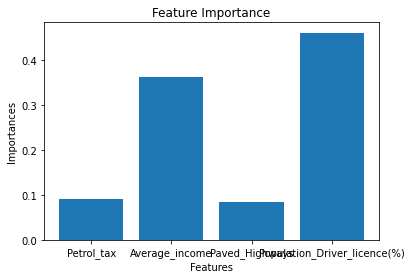

In [24]:
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.bar(x.columns, reg.feature_importances_)